
#Installing and importing library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 10 kB/s 
     |████████████████████████████████| 47.6 MB 37 kB/s 


In [3]:
import matplotlib.pyplot as plt

import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16
import pandas as pd


In [4]:
!pip install minecart

     |████████████████████████████████| 100 kB 3.9 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 


In [5]:
import minecart
from PIL import Image
import numpy as np
%matplotlib inline

# Extracting Image from PDF

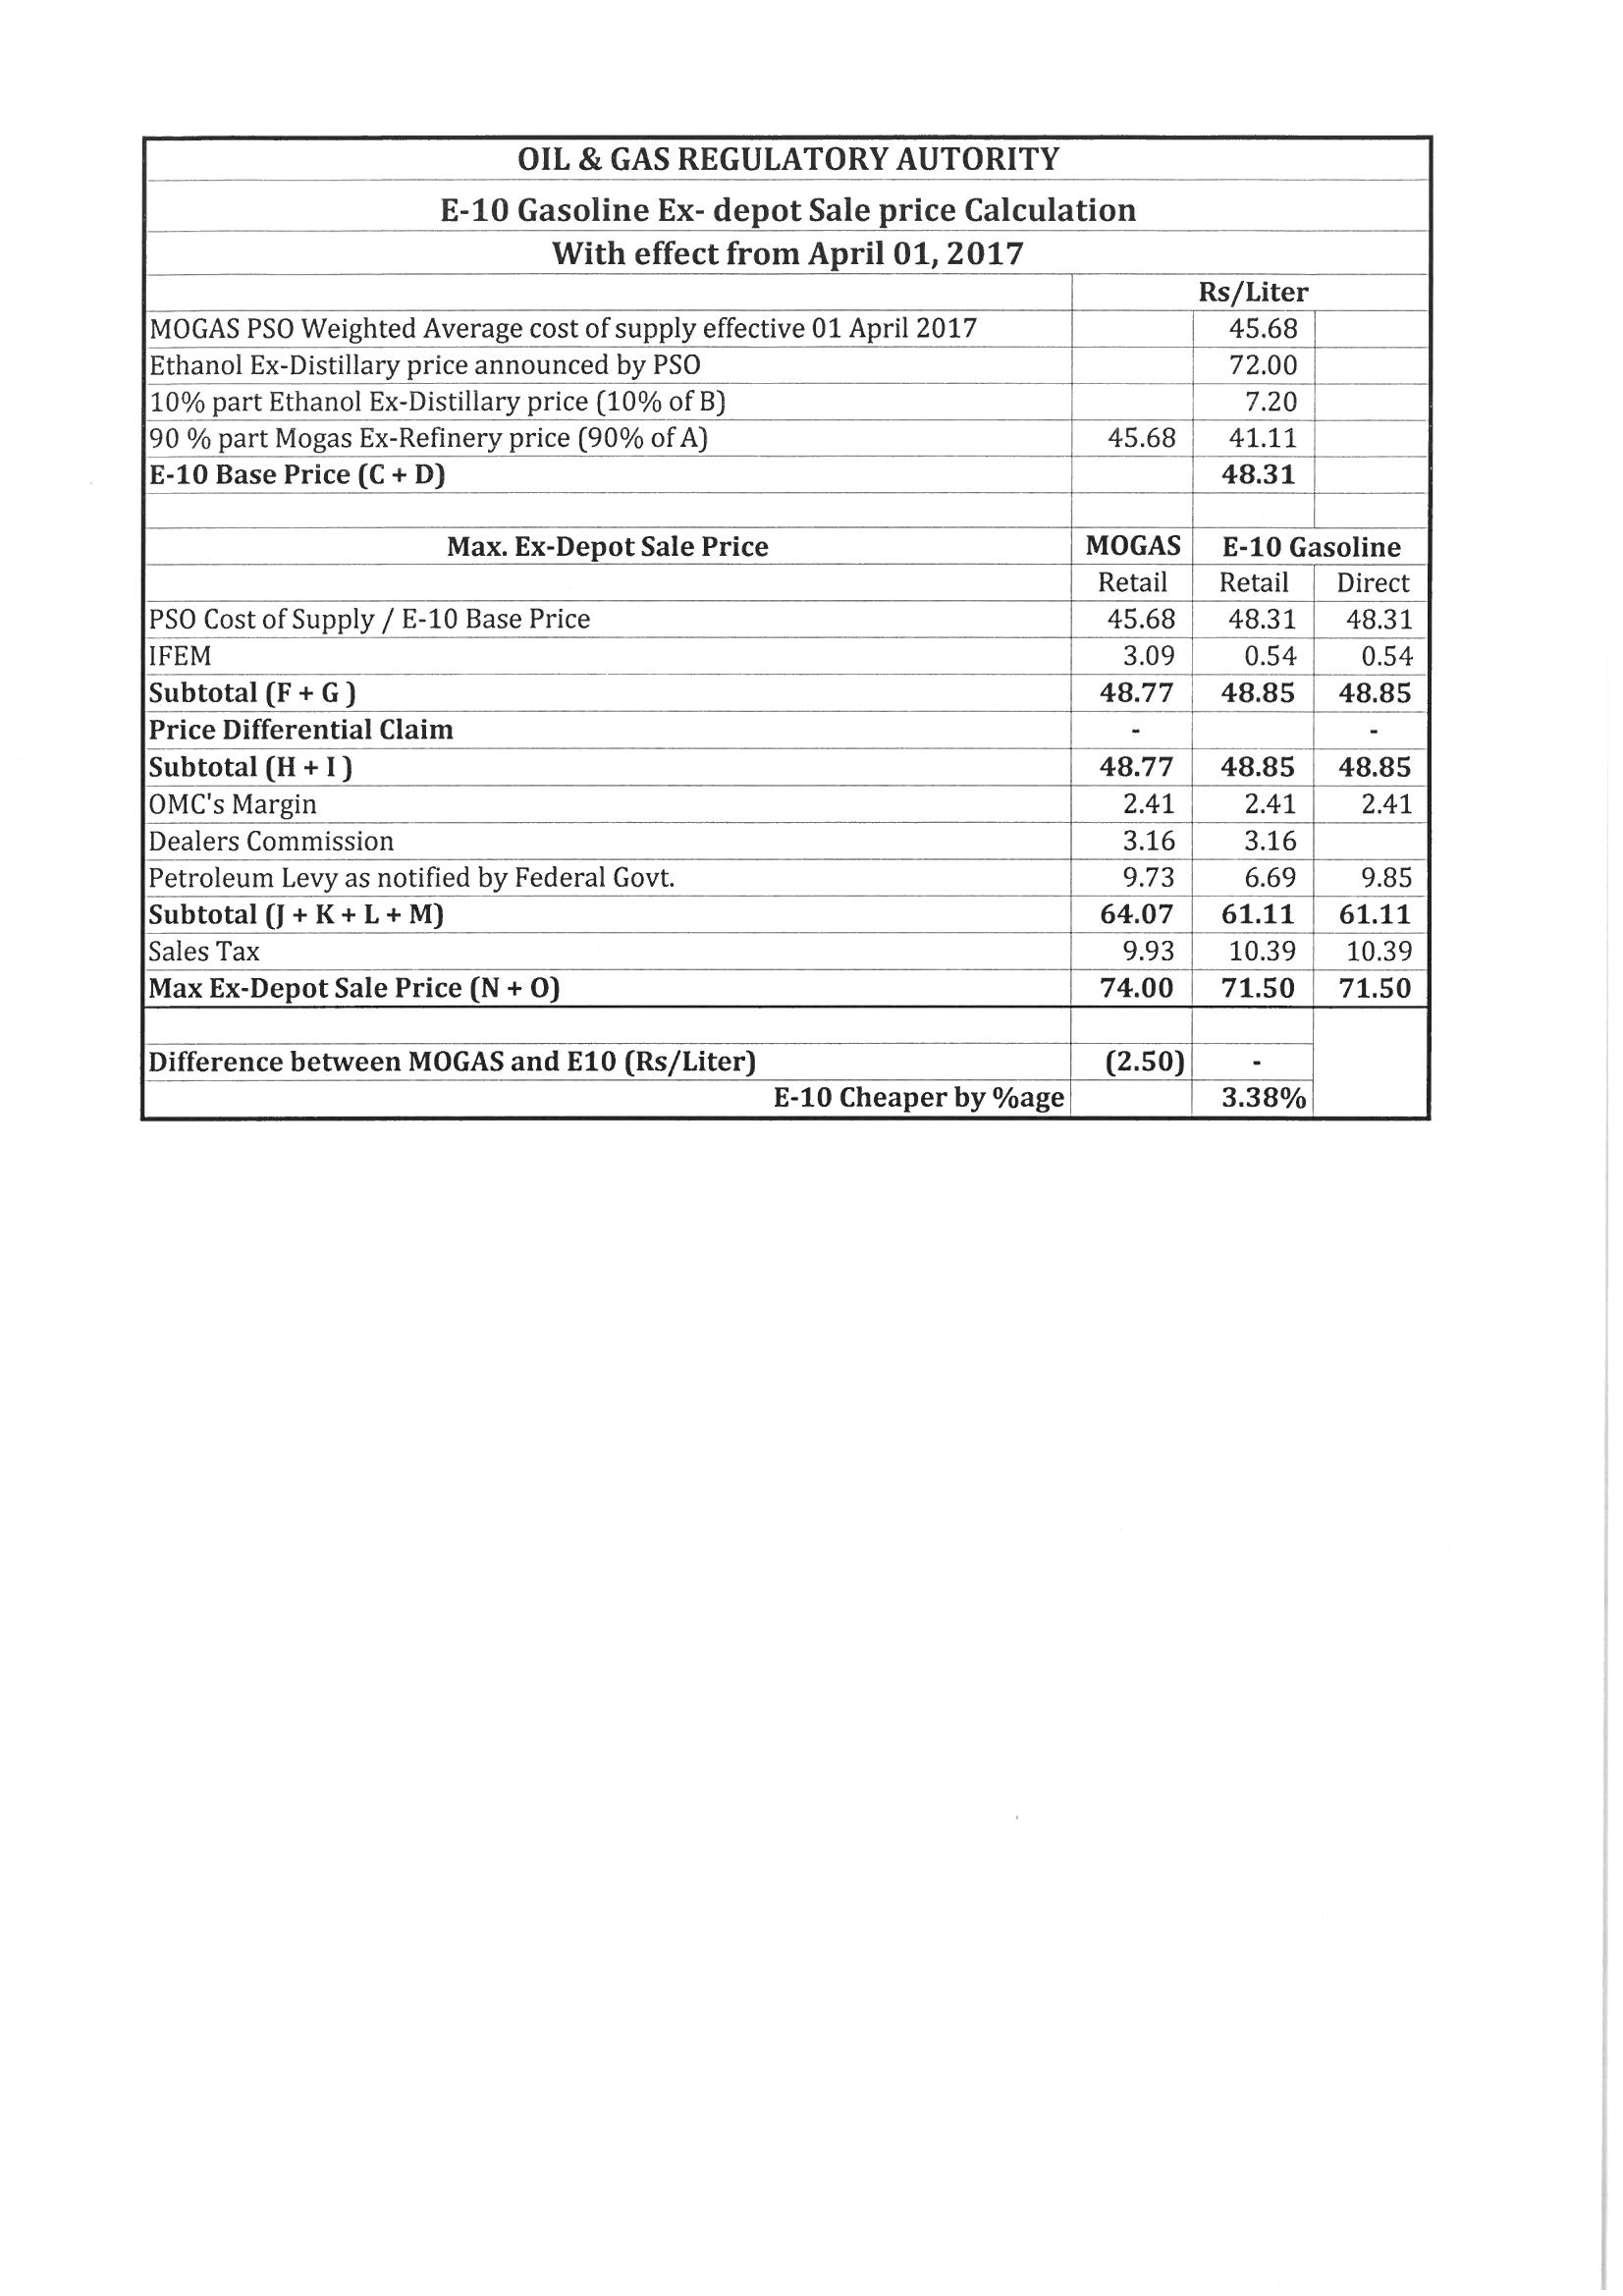

In [6]:

#getting image from pdf file
pdffile = open('/content/drive/MyDrive/Colab Notebooks/e_10_gasoline_price_notification_effective_dated_april_01_2017.pdf', 'rb')
doc = minecart.Document(pdffile)

page = doc.get_page(0) # getting a single page

#iterating through all pages
for page in doc.iter_pages():
    image = page.images[0].as_pil()  # requires pillow
    
display(image) # displaying the image below

In [7]:
reader = easyocr.Reader(['en']) # reading text in English mode

output = reader.readtext(image) # storing text of image into output variable

In [8]:

output # Image data now in text are store in "output variable"

[([[525, 145], [1085, 145], [1085, 181], [525, 181]],
  'OIL & GAS REGULATORY AUTORITY',
  0.9142769666920958),
 ([[444, 191], [1162, 191], [1162, 241], [444, 241]],
  'E-10 Gasoline Ex- depot Sale price Calculation',
  0.8562066223232948),
 ([[561, 240], [1047, 240], [1047, 282], [561, 282]],
  'With effect from April 01,2017',
  0.6027064678165291),
 ([[1218, 282], [1338, 282], [1338, 314], [1218, 314]],
  'Rs/Liter',
  0.46449911675154115),
 ([[151, 317], [1001, 317], [1001, 357], [151, 357]],
  'MOGAS PSO Weighted Average cost of supply effective 01 April 2017',
  0.8855647084045721),
 ([[1250, 320], [1326, 320], [1326, 350], [1250, 350]],
  '45.68',
  0.9998452338067905),
 ([[148, 353], [719, 353], [719, 394], [148, 394]],
  'Ethanol Ex-Distillary price announced by PSO',
  0.9818998722712489),
 ([[1250, 358], [1326, 358], [1326, 388], [1250, 388]],
  '72.00',
  0.7016608930148654),
 ([[151, 389], [745, 389], [745, 430], [151, 430]],
  '10% part Ethanol Ex-Distillary price (10% of

#Extracting useful text from output varaible that store image text

In [9]:
#remove garbage value and store useful data into list
list1=[]
for i in range(len(output)):
    list1.append(output[i][1])

In [10]:
list1

['OIL & GAS REGULATORY AUTORITY',
 'E-10 Gasoline Ex- depot Sale price Calculation',
 'With effect from April 01,2017',
 'Rs/Liter',
 'MOGAS PSO Weighted Average cost of supply effective 01 April 2017',
 '45.68',
 'Ethanol Ex-Distillary price announced by PSO',
 '72.00',
 '10% part Ethanol Ex-Distillary price (10% of B)',
 '7.20',
 '90 % part Mogas Ex-Refinery price (90% of A)',
 '45.68',
 '41.11',
 'E-1O Base Price (C + D)',
 '48.31',
 'Max Ex-Depot Sale Price',
 'MOGAS',
 'E-10 Gasoline',
 'Retail',
 'Retail',
 'Direct',
 'PSO Cost of Supply',
 'E-10 Base Price',
 '45.68',
 '48.31',
 '48.31',
 'IFEM',
 '3.09',
 '0.54',
 '0.54',
 'Subtotal (F + G )',
 '48.77',
 '48.85',
 '48.85',
 'Price Differential Claim',
 'Subtotal (H + I)',
 '48.77',
 '48.85',
 '48.85',
 "OMC' s Margin",
 '2.41',
 '2.41',
 '2.41',
 'Dealers Commission',
 '3.16',
 '3.16',
 'Petroleum Levy as notified by Federal Govt;',
 '9.73',
 '6.69',
 '9.85',
 'Subtotal (J + K+ L+ M)',
 '64.07',
 '61.11',
 '61.11',
 'Sales Tax'

In [11]:
# this is exception handling  code which detect float in string or not
t1=[]
def check_float(potential_float):
    try:
        float(potential_float)

        return True
    except ValueError:
        return False


In [12]:
# this is exception handling  code which detect integer in code or not
t1=[]
def check_int(potential_float):
    try:
        int(potential_float)

        return True
    except ValueError:
        return False


In [13]:
for i in range(len(list1)):# if data are int type then replace it to with float
  if(check_int(list1[i])):
    list1[i] = list1[i+1]

In [14]:
list1 #useful  data are  stored in varaible "list"

['OIL & GAS REGULATORY AUTORITY',
 'E-10 Gasoline Ex- depot Sale price Calculation',
 'With effect from April 01,2017',
 'Rs/Liter',
 'MOGAS PSO Weighted Average cost of supply effective 01 April 2017',
 '45.68',
 'Ethanol Ex-Distillary price announced by PSO',
 '72.00',
 '10% part Ethanol Ex-Distillary price (10% of B)',
 '7.20',
 '90 % part Mogas Ex-Refinery price (90% of A)',
 '45.68',
 '41.11',
 'E-1O Base Price (C + D)',
 '48.31',
 'Max Ex-Depot Sale Price',
 'MOGAS',
 'E-10 Gasoline',
 'Retail',
 'Retail',
 'Direct',
 'PSO Cost of Supply',
 'E-10 Base Price',
 '45.68',
 '48.31',
 '48.31',
 'IFEM',
 '3.09',
 '0.54',
 '0.54',
 'Subtotal (F + G )',
 '48.77',
 '48.85',
 '48.85',
 'Price Differential Claim',
 'Subtotal (H + I)',
 '48.77',
 '48.85',
 '48.85',
 "OMC' s Margin",
 '2.41',
 '2.41',
 '2.41',
 'Dealers Commission',
 '3.16',
 '3.16',
 'Petroleum Levy as notified by Federal Govt;',
 '9.73',
 '6.69',
 '9.85',
 'Subtotal (J + K+ L+ M)',
 '64.07',
 '61.11',
 '61.11',
 'Sales Tax'

In [15]:
len(list1)# print the lenght of list1

66

#Separation of data into columns according to image table for making dataframe

In [16]:

# columns one code
c1=[]
for i in range(0,65):
  if(check_float(list1[i])== False and list1[i]!='Rs/Liter' and list1[i]!='MOGAS' and list1[i]!='Retail' and list1[i]!='Direct' and list1[i]!='(2.50)' and list1[i]!='3.38%'  and list1[i]!='E-10 Gasoline' ):
    c1.append(list1[i])
for i in c1:
  if(i=='E-10 Base Price'):
    c1.remove(i)
for i in range(23):
  if(c1[i]=='With effect from April 01,2017'):
    c1.insert(i+1,'')
  elif(c1[i]=='Max Ex-Depot Sale Price'):
    c1.insert(i+1,'')


In [17]:
c1 # printing the value of column below

['OIL & GAS REGULATORY AUTORITY',
 'E-10 Gasoline Ex- depot Sale price Calculation',
 'With effect from April 01,2017',
 '',
 'MOGAS PSO Weighted Average cost of supply effective 01 April 2017',
 'Ethanol Ex-Distillary price announced by PSO',
 '10% part Ethanol Ex-Distillary price (10% of B)',
 '90 % part Mogas Ex-Refinery price (90% of A)',
 'E-1O Base Price (C + D)',
 'Max Ex-Depot Sale Price',
 '',
 'PSO Cost of Supply',
 'IFEM',
 'Subtotal (F + G )',
 'Price Differential Claim',
 'Subtotal (H + I)',
 "OMC' s Margin",
 'Dealers Commission',
 'Petroleum Levy as notified by Federal Govt;',
 'Subtotal (J + K+ L+ M)',
 'Sales Tax',
 'Max Ex-Depot Sale Price (N + 0)',
 'Difference between MOGAS and E1O (Rs/Liter)',
 'E-1O Cheaper by %age']

In [18]:
len(c1) # print the lenght of column 1

24

In [19]:
t=[]
# second column code
for i in range(0,66):
  if (list1[i]=='Rs/Liter'):
    t.append(list1[i])
  if(list1[i]=='(2.50)'):
      t.append(list1[i])
  if(i<63):
    if(check_float(list1[i])==check_float(list1[i+1])==check_float(list1[i+2])==True):
      t.append(list1[i])
    if( check_float(list1[i-1])==False and check_float(list1[i])==True and  check_float(list1[i+1])==True and check_float(list1[i+2])==False):
        t.append(list1[i])
    elif(list1[i]=='MOGAS'):
      t.append(list1[i])
    elif(list1[i]=='Retail' and list1[i+1]!='Retail'):
      t.append(list1[i])
    
    
c2=[]
c2=t
for i in range(0,22):
  if(i<3):
    c2.insert(i,'')
  elif(i>=4 and i<7):
    c2.insert(i,'')
c2.append('')

for i in range(len(c2)):
  if(c2[i]=='45.68'):
    c2.insert(i+1,'')
    break


for i in range(len(c2)):
  if(c2[i]=='48.77'):
    c2.insert(i+1,'')
    break


In [20]:
len(c2) #print the lenght of column 2

24

In [21]:
c2 # printing the value of column 2 below

['',
 '',
 '',
 'Rs/Liter',
 '',
 '',
 '',
 '45.68',
 '',
 'MOGAS',
 'Retail',
 '45.68',
 '3.09',
 '48.77',
 '',
 '48.77',
 '2.41',
 '3.16',
 '9.73',
 '64.07',
 '9.93',
 '74.00',
 '(2.50)',
 '']

In [22]:
#Third column  code 
c3=[]
for i in range(0,66):
  if(i<63 and i>3):
    if(check_float(list1[i-1])== False and check_float(list1[i+1])== False and list1[i]!= 'MOGAS' and list1[i]!= '(2.50)'  or check_float(list1[i-1])== True and check_float(list1[i+1])== True  and check_float(list1[i])):
      if(list1[i]!= 'Direct' ):
        if(list1[i]=='Retail'):
           if( 'Retail' not in c3):
             c3.append(list1[i])
        else:
          c3.append(list1[i])
 
for i in range(0,22):
  if(i<3):
    c3.insert(i,'')
  elif(i==3):
    c3.insert(i,'Rs/Liter')
  elif(c3[i]=='PSO Cost of Supply'):
    c3.remove(c3[i])
  elif(c3[i]=='48.85' and c3[i-1]=='0.54'):
    c3.insert(i+1,'')
  elif(c3[i]=='7.20'):
    c3.insert(i+1,'41.11')
  elif(c3[i]=='2.41'):
    c3.insert(i+1,'3.16')
  elif(c3[i]=='71.50'):
    c3.insert(i+1,'')
    c3.insert(i+2,'3.38%')
    break

          
 


In [23]:
len(c3) # print the lenght of column 3

24

In [24]:
c3 # printing the value of column 3

['',
 '',
 '',
 'Rs/Liter',
 '45.68',
 '72.00',
 '7.20',
 '41.11',
 '48.31',
 'E-10 Gasoline',
 'Retail',
 '48.31',
 '0.54',
 '48.85',
 '',
 '48.85',
 '2.41',
 '3.16',
 '6.69',
 '61.11',
 '10.39',
 '71.50',
 '',
 '3.38%']

In [25]:
# fourth column code
temp=[]
for i in range(0,67):
  if(i>=16):
    if(check_float(list1[i-1])==True and check_float(list1[i+1])==False):
      temp.append(list1[i])
# removing string from last row
for i in range(0,11):
  if(check_float(temp[i])==False):
    temp.remove(temp[i])

# inserting space after 2.14
c4=[]
for i in range(0,10):
  if(temp[i]=='2.41'):
    c4.append(temp[i])
    c4.append('')
  else:
     c4.append(temp[i])


c4. insert(0, 'E-10 Gasoline') 
c4. insert(1, 'Direct')



a=len(c4)
c4. insert(a+1, '')
c4. insert(a+2, '')
c4. insert(0, 'Rs/Liter')

for i in range(1,6):
  c4. insert(i, '')

for i in range(3):
  c4.insert(i,'')
c4.remove('3.16')
c4.insert(14,'')


In [26]:
len(c4) # print the lenght of column 4

24

In [27]:
c4 # printing the value of column 4

['',
 '',
 '',
 'Rs/Liter',
 '',
 '',
 '',
 '',
 '',
 'E-10 Gasoline',
 'Direct',
 '48.31',
 '0.54',
 '48.85',
 '',
 '48.85',
 '2.41',
 '',
 '9.85',
 '61.11',
 '10.39',
 '71.50',
 '',
 '']

# Converting columns into dataframe according to given image

In [28]:

df = pd.DataFrame(list(zip(c1, c2,c3,c4)), columns =['text', 'RS1','RS2','RS3'])

In [29]:
df # printing the value of dataframe df below

,text,RS1,RS2,RS3
0,OIL & GAS REGULATORY AUTORITY,,,
1,E-10 Gasoline Ex- depot Sale price Calculation,,,
2,"With effect from April 01,2017",,,
3,,Rs/Liter,Rs/Liter,Rs/Liter
4,MOGAS PSO Weighted Average cost of supply effe...,,45.68,
5,Ethanol Ex-Distillary price announced by PSO,,72.00,
6,10% part Ethanol Ex-Distillary price (10% of B),,7.20,
7,90 % part Mogas Ex-Refinery price (90% of A),45.68,41.11,
8,E-1O Base Price (C + D),,48.31,
9,Max Ex-Depot Sale Price,MOGAS,E-10 Gasoline,E-10 Gasoline


#Converting dataframe into CSV

In [30]:
df.to_csv('test.csv') # converting into CSV

# Reading data from CSV

In [31]:
df1 = pd.read_csv('test.csv')

In [32]:
df1 # printing datframe of df1 below

,Unnamed: 0,text,RS1,RS2,RS3
0,0,OIL & GAS REGULATORY AUTORITY,NaN,NaN,NaN
1,1,E-10 Gasoline Ex- depot Sale price Calculation,NaN,NaN,NaN
2,2,"With effect from April 01,2017",NaN,NaN,NaN
3,3,NaN,Rs/Liter,Rs/Liter,Rs/Liter
4,4,MOGAS PSO Weighted Average cost of supply effe...,NaN,45.68,NaN
5,5,Ethanol Ex-Distillary price announced by PSO,NaN,72.00,NaN
6,6,10% part Ethanol Ex-Distillary price (10% of B),NaN,7.20,NaN
7,7,90 % part Mogas Ex-Refinery price (90% of A),45.68,41.11,NaN
8,8,E-1O Base Price (C + D),NaN,48.31,NaN
9,9,Max Ex-Depot Sale Price,MOGAS,E-10 Gasoline,E-10 Gasoline


# Operation on CSV file

In [33]:
del df1['Unnamed: 0'] # droping Unnamed col

In [34]:
df1 # displaying dafaframe of df1

,text,RS1,RS2,RS3
0,OIL & GAS REGULATORY AUTORITY,NaN,NaN,NaN
1,E-10 Gasoline Ex- depot Sale price Calculation,NaN,NaN,NaN
2,"With effect from April 01,2017",NaN,NaN,NaN
3,NaN,Rs/Liter,Rs/Liter,Rs/Liter
4,MOGAS PSO Weighted Average cost of supply effe...,NaN,45.68,NaN
5,Ethanol Ex-Distillary price announced by PSO,NaN,72.00,NaN
6,10% part Ethanol Ex-Distillary price (10% of B),NaN,7.20,NaN
7,90 % part Mogas Ex-Refinery price (90% of A),45.68,41.11,NaN
8,E-1O Base Price (C + D),NaN,48.31,NaN
9,Max Ex-Depot Sale Price,MOGAS,E-10 Gasoline,E-10 Gasoline


In [35]:
ind=[0,1,2,3,9,10,22,23] # removing rows  that contain string  in Rs
i=0
while i<8:
  df1=  df1.drop(ind[i])
  i+=1


In [36]:
df1

,text,RS1,RS2,RS3
4,MOGAS PSO Weighted Average cost of supply effe...,NaN,45.68,NaN
5,Ethanol Ex-Distillary price announced by PSO,NaN,72.00,NaN
6,10% part Ethanol Ex-Distillary price (10% of B),NaN,7.20,NaN
7,90 % part Mogas Ex-Refinery price (90% of A),45.68,41.11,NaN
8,E-1O Base Price (C + D),NaN,48.31,NaN
11,PSO Cost of Supply,45.68,48.31,48.31
12,IFEM,3.09,0.54,0.54
13,Subtotal (F + G ),48.77,48.85,48.85
14,Price Differential Claim,NaN,NaN,NaN
15,Subtotal (H + I),48.77,48.85,48.85


In [37]:
df1.isnull() # checking NaN in df1

,text,RS1,RS2,RS3
4,False,True,False,True
5,False,True,False,True
6,False,True,False,True
7,False,False,False,True
8,False,True,False,True
11,False,False,False,False
12,False,False,False,False
13,False,False,False,False
14,False,True,True,True
15,False,False,False,False


In [38]:
df1=df1.pad() # filling dataframe NaN value by uppar values

In [39]:
df1 # printing value of df1 below after operation

,text,RS1,RS2,RS3
4,MOGAS PSO Weighted Average cost of supply effe...,NaN,45.68,NaN
5,Ethanol Ex-Distillary price announced by PSO,NaN,72.00,NaN
6,10% part Ethanol Ex-Distillary price (10% of B),NaN,7.20,NaN
7,90 % part Mogas Ex-Refinery price (90% of A),45.68,41.11,NaN
8,E-1O Base Price (C + D),45.68,48.31,NaN
11,PSO Cost of Supply,45.68,48.31,48.31
12,IFEM,3.09,0.54,0.54
13,Subtotal (F + G ),48.77,48.85,48.85
14,Price Differential Claim,48.77,48.85,48.85
15,Subtotal (H + I),48.77,48.85,48.85


In [40]:
# after using .pad() function some value are still NaN
# now we use .bfill() NaN value filled by bottom row value

In [41]:
df1=df1.bfill() # .bfill() NaN value filled by bottom row value

In [42]:
df1 # printing value of df1

,text,RS1,RS2,RS3
4,MOGAS PSO Weighted Average cost of supply effe...,45.68,45.68,48.31
5,Ethanol Ex-Distillary price announced by PSO,45.68,72.00,48.31
6,10% part Ethanol Ex-Distillary price (10% of B),45.68,7.20,48.31
7,90 % part Mogas Ex-Refinery price (90% of A),45.68,41.11,48.31
8,E-1O Base Price (C + D),45.68,48.31,48.31
11,PSO Cost of Supply,45.68,48.31,48.31
12,IFEM,3.09,0.54,0.54
13,Subtotal (F + G ),48.77,48.85,48.85
14,Price Differential Claim,48.77,48.85,48.85
15,Subtotal (H + I),48.77,48.85,48.85


In [43]:
df1['RS1'] # check dtype

4     45.68
5     45.68
6     45.68
7     45.68
8     45.68
11    45.68
12     3.09
13    48.77
14    48.77
15    48.77
16     2.41
17     3.16
18     9.73
19    64.07
20     9.93
21    74.00
Name: RS1, dtype: object

In [44]:
df1['RS1']=pd.to_numeric(df1['RS1']) # converting dtype to numeric

In [45]:
df1['RS1'] #  now check dtype again

4     45.68
5     45.68
6     45.68
7     45.68
8     45.68
11    45.68
12     3.09
13    48.77
14    48.77
15    48.77
16     2.41
17     3.16
18     9.73
19    64.07
20     9.93
21    74.00
Name: RS1, dtype: float64

In [46]:
df1['RS2']=pd.to_numeric(df1['RS2']) # converting dtype to numeric

In [47]:
df1['RS3']=pd.to_numeric(df1['RS3']) # converting dtype to numeric

In [48]:
print("Sum of RS1 = "+str(df1['RS1'].sum())) # sum of col RS1
print("Sum of RS2 = "+str(df1['RS2'].sum())) # sum of col RS2
print("Sum of RS3 = "+str(df1['RS3'].sum())) # sum of col RS3

Sum of RS1 = 586.7800000000001
Sum of RS2 = 564.96
Sum of RS3 = 594.62


In [49]:
max(df1['RS1'].sum(),df1['RS2'].sum(),df1['RS3'].sum()) # max sum is

594.62

In [50]:
#calulating Sum, Mean, Max, Min
analytics = pd.DataFrame({'Total RS1':df1['RS1'].sum(),
                          'Average RS1':df1['RS1'].mean(),
                          'Max RS1':df1['RS1'].max(),'Min':df1['RS1'].min()},
                          index=[1])
analytics #printing value of dataframe analytics

,Total RS1,Average RS1,Max RS1,Min
1,586.78,36.67375,74.0,2.41


In [51]:
analytics = pd.DataFrame({'Total RS2':df1['RS2'].sum(),
                          'Average RS2':df1['RS2'].mean(),
                          'Max RS2':df1['RS2'].max(),'Min':df1['RS2'].min()},
                          index=[1])
analytics #printing value of dataframe analytics

,Total RS2,Average RS2,Max RS2,Min
1,564.96,35.31,72.0,0.54


In [52]:
analytics = pd.DataFrame({'Total RS3':df1['RS3'].sum(),
                          'Average RS3':df1['RS3'].mean(),
                          'Max RS3':df1['RS3'].max(),'Min':df1['RS3'].min()},
                          index=[1])
analytics #printing value of dataframe analytics

,Total RS3,Average RS3,Max RS3,Min
1,594.62,37.16375,71.5,0.54


# Data visulization

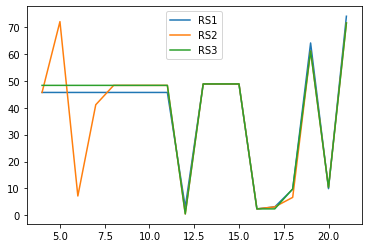

In [53]:
df1.plot() # ploting value of df1

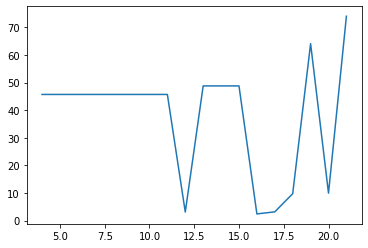

In [54]:
df1['RS1'].plot() # ploting value of df1 col 1 

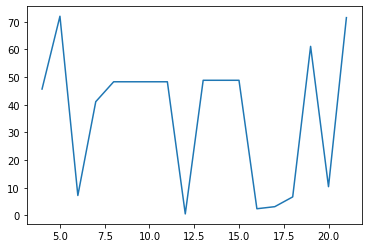

In [55]:
df1['RS2'].plot()# ploting value of df1 col 2

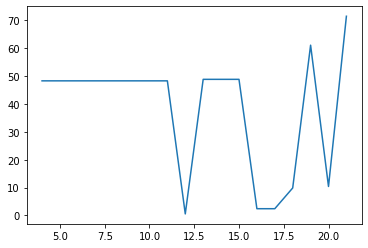

In [56]:
df1['RS3'].plot()# ploting value of df1 col 3

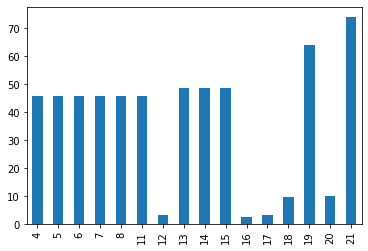

In [57]:
df1['RS1'].plot.bar() # histogram  representation of col 1 of df1

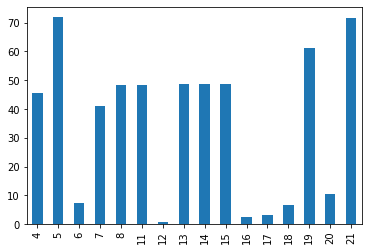

In [58]:
df1['RS2'].plot.bar() # histogram  representation of col 2 of df1

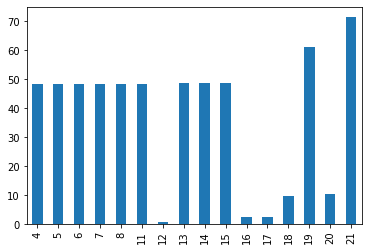

In [59]:
df1['RS3'].plot.bar() # histogram  representation of col 3 of df1

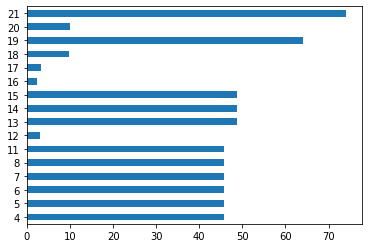

In [60]:
df1['RS1'].plot.barh() # vertically histogram  representation of col 1 of df1 

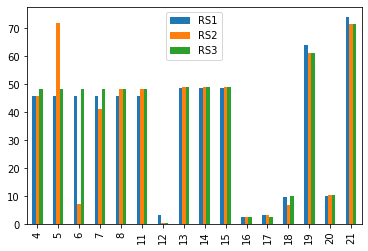

In [61]:
df1.plot.bar() # bar ploting of col1 col2 and col3 of df1

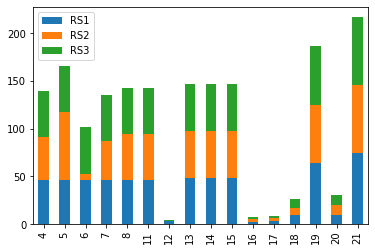

In [62]:
df1.plot.bar(stacked = True)# bar ploting another way

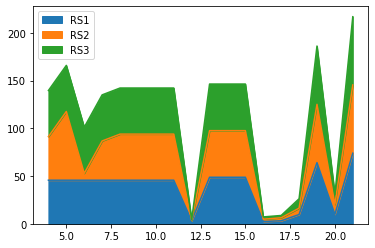

In [63]:
df1.plot.area()# area representation of 3 cols of df1